In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from datetime import timedelta, datetime
from time import sleep

In [2]:
dataframe=pd.read_csv('Bitcoin.csv',header=0)
dataframe.head()

,Date,Price
0,12-Mar-20,"4,826.00"
1,13-Mar-20,"5,584.30"
2,14-Mar-20,"5,182.70"
3,15-Mar-20,"5,366.30"
4,16-Mar-20,"5,030.00"


In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    390 non-null    object
 1   Price   390 non-null    object
dtypes: object(2)
memory usage: 6.2+ KB


In [4]:
import locale
from locale import atof

locale.setlocale(locale.LC_NUMERIC, '') 
dataframe['Price']=dataframe['Price'].apply(atof)

In [5]:
dataframe['Date'] = pd.to_datetime(dataframe['Date'], errors='coerce')

In [6]:
ord_enc = OrdinalEncoder()
dataframe["Encoded Date"] = ord_enc.fit_transform(dataframe[["Date"]])

In [7]:
dataframe.sample(5)

,Date,Price,Encoded Date
113,2020-07-03,9067.1,113.0
95,2020-06-15,9425.4,95.0
56,2020-05-07,9979.8,56.0
4,2020-03-16,5030.0,4.0
323,2021-01-29,34301.8,323.0


In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          390 non-null    datetime64[ns]
 1   Price         390 non-null    float64       
 2   Encoded Date  390 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 9.3 KB


Text(0.5, 1.0, 'Bitcoin price')

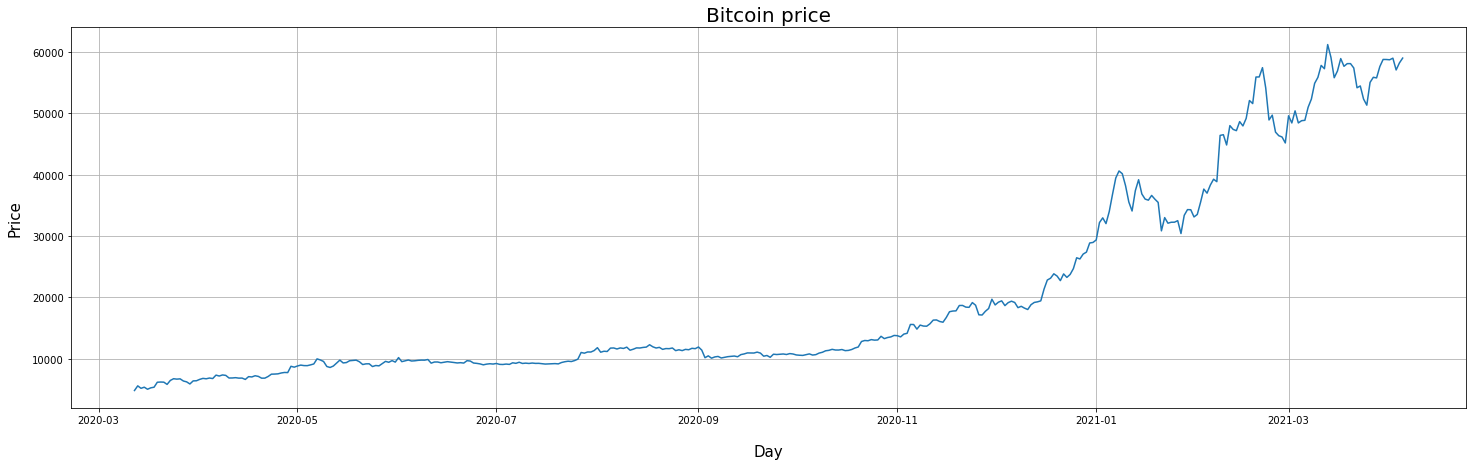

In [9]:
plt.figure(figsize=(25, 7))
plt.grid()
plt.plot(dataframe['Date'],dataframe['Price'])
plt.xlabel('Day',fontsize=15, labelpad=19)
plt.ylabel('Price',fontsize=15, labelpad=10)
plt.title("Bitcoin price",fontsize=20)

Linear and polynomial model

<ipython-input-10-e09d47962844>:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = dataframe_1['Encoded Date'][:, np.newaxis]
<ipython-input-10-e09d47962844>:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = dataframe_1['Price'][:, np.newaxis]


RMSE: 3742.057295432106
R2 score: 0.94529771492581


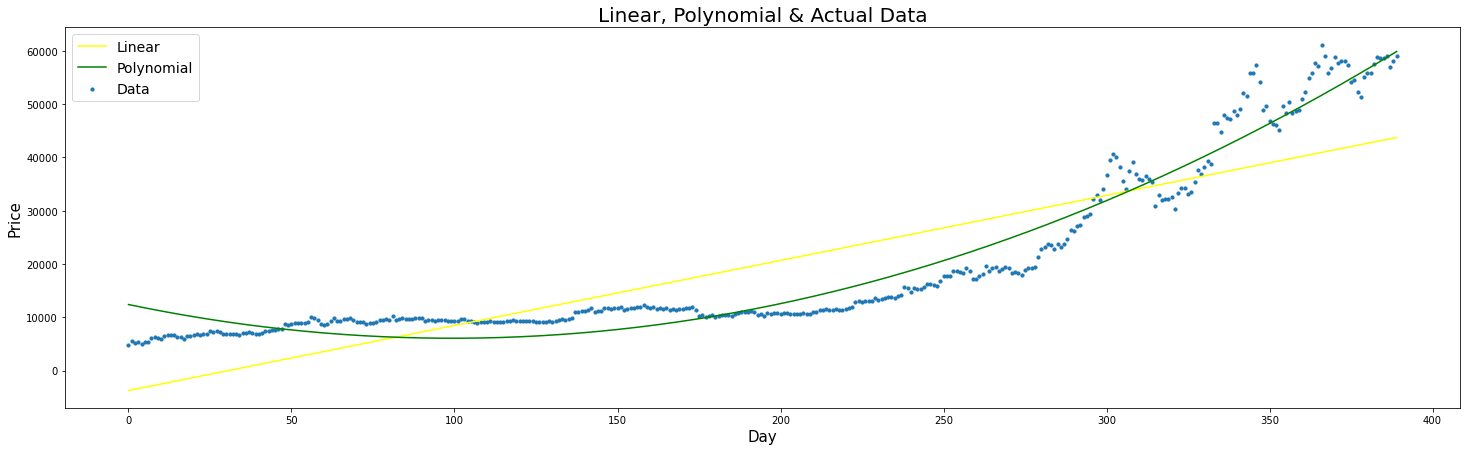

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import operator

dataframe_1 = dataframe

model = LinearRegression()

x = dataframe_1['Encoded Date'][:, np.newaxis]
y = dataframe_1['Price'][:, np.newaxis]
model.fit(x,y)

ypolypredlinear = model.predict(x)

# Polynomial Model
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)


rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print('RMSE:',rmse)
print('R2 score:',r2)
plt.figure(figsize=(25, 7))

plt.scatter(x, y, s=10, label='Data')
plt.plot(x, ypolypredlinear, color='yellow', label='Linear')
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='green', label='Polynomial')
plt.xlabel('Day',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.title("Linear, Polynomial & Actual Data",fontsize=20)
plt.legend(loc="best",  scatterpoints=1, prop={'size': 14})
plt.show()

In [11]:
start_date = '2021-04-06'
end_date='2021-04-20'
dates = pd.date_range(start=start_date, end=end_date)

pred_x= [item for item in range(int(x[-1:][0][0]+1),int(x[-1:][0][0])+16)]

dataframe_2 = pd.DataFrame({'Date':dates,'Encoded Date':pred_x})
dataframe_1= dataframe_1.append(dataframe_2, ignore_index=True)

In [12]:
dataframe_1.tail(20)

,Date,Price,Encoded Date
385,2021-04-01,58718.3,385.0
386,2021-04-02,58977.3,386.0
387,2021-04-03,57059.9,387.0
388,2021-04-04,58199.9,388.0
389,2021-04-05,58993.4,389.0
390,2021-04-06,NaN,390.0
391,2021-04-07,NaN,391.0
392,2021-04-08,NaN,392.0
393,2021-04-09,NaN,393.0
394,2021-04-10,NaN,394.0


KRR

In [13]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared

In [14]:
x = dataframe['Encoded Date'][:, np.newaxis]
y = dataframe['Price'][:, np.newaxis]
pred_x= [item for item in range(int(x[-1:][0][0]+1),int(x[-1:][0][0])+16)]

<ipython-input-14-0ba3f08dbbd3>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = dataframe['Encoded Date'][:, np.newaxis]
<ipython-input-14-0ba3f08dbbd3>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = dataframe['Price'][:, np.newaxis]


In [15]:
param_grid = {"alpha": [1e0, 1e-1, 1e-2, 1e-3],
              "kernel": [ExpSineSquared(l, p)
                         for l in np.logspace(-2, 2, 10)
                         for p in np.logspace(0, 2, 10)]}

kr = GridSearchCV(KernelRidge(), param_grid=param_grid)
stime = time.time()
kr.fit(x, y)

stime = time.time()

pred_x_array = np.array(pred_x)
pred_x_array= pred_x_array[:, None]
y_kr = kr.predict(pred_x_array)

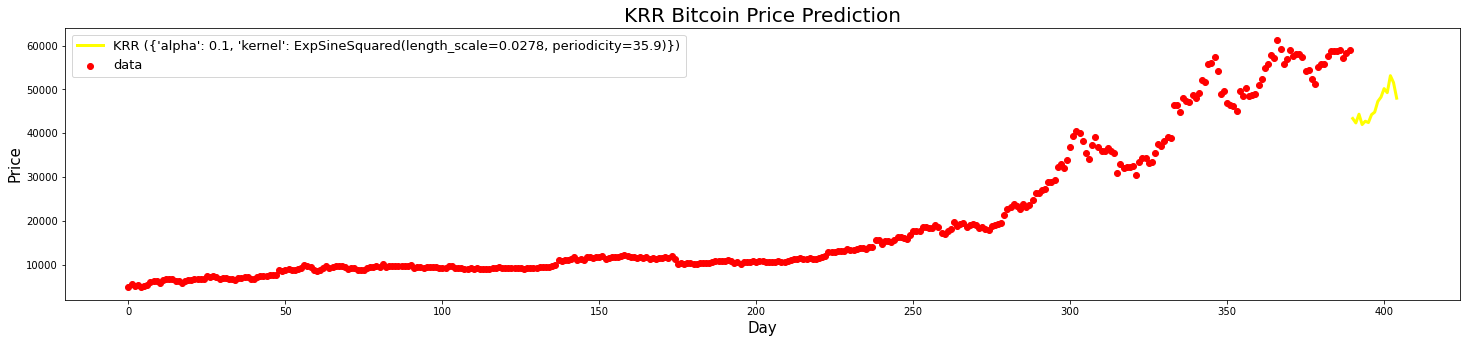

In [16]:
plt.figure(figsize=(25, 5))
lw = 3
plt.scatter(x, y, label='data', color='red')
plt.plot(pred_x_array, y_kr, color='yellow', lw=lw,
         label='KRR (%s)' % kr.best_params_)

plt.xlabel('Day',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.title("KRR Bitcoin Price Prediction",fontsize=20)
plt.legend(loc="best",  scatterpoints=1, prop={'size': 13})
plt.show()

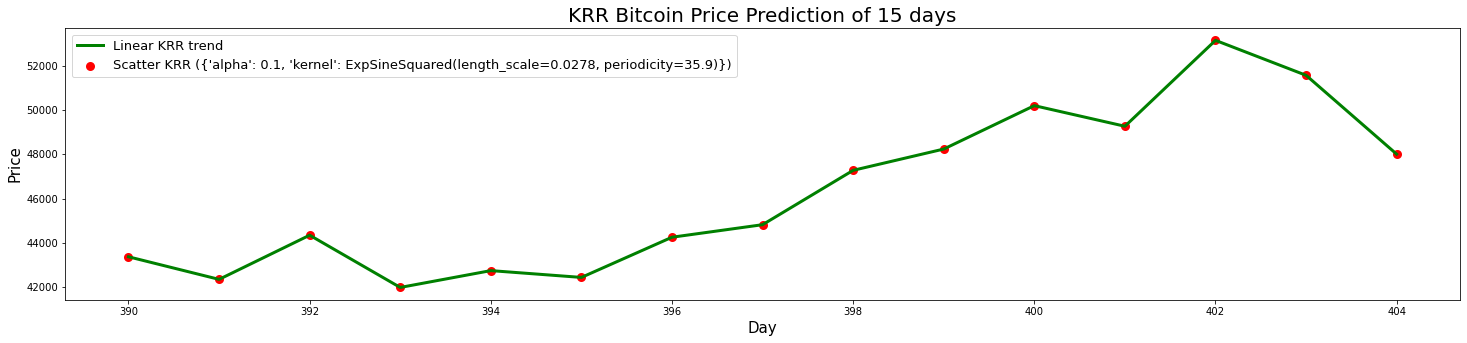

In [17]:
plt.figure(figsize=(25, 5))
lw = 3
plt.scatter(pred_x_array, y_kr, color='red', lw=lw,
         label='Scatter KRR (%s)' % kr.best_params_)
plt.plot(pred_x_array, y_kr, color='green', lw=lw,
         label='Linear KRR trend')

plt.xlabel('Day',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.title("KRR Bitcoin Price Prediction of 15 days",fontsize=20)
plt.legend(loc="best",  scatterpoints=1, prop={'size': 13})
plt.show()

Curve smoothing : ConvolutionSmoother

In [18]:
!pip install tsmoothie

In [19]:
from tsmoothie.smoother import *

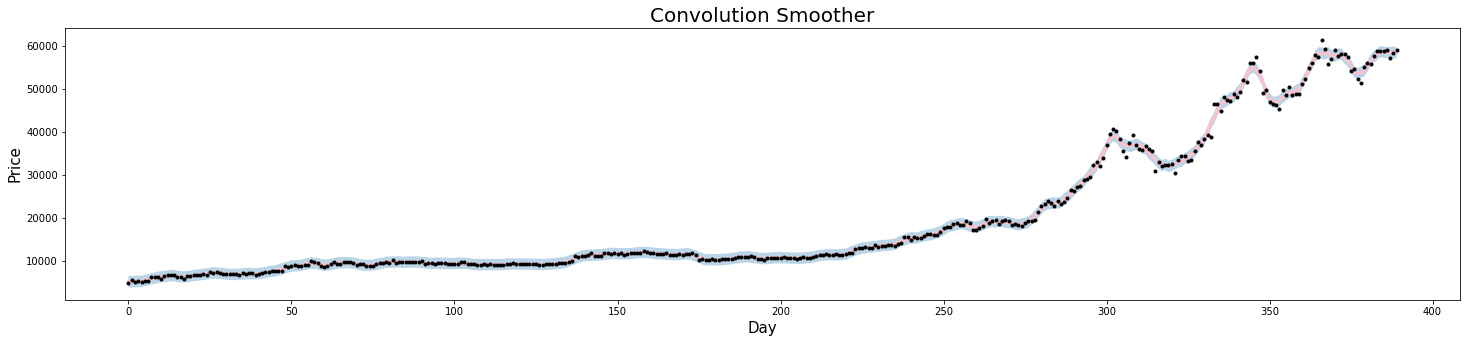

In [20]:
plt.figure(figsize=(25, 5))
lw = 3

smoother = ConvolutionSmoother(window_len=5, window_type='ones')
smoother.smooth(y)
# generate intervals
low, up = smoother.get_intervals('sigma_interval', n_sigma=2)
plt.plot(smoother.smooth_data[0], linewidth=3, color='pink')
plt.plot(smoother.data[0], '.k')
plt.xlabel('Day',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.title("Convolution Smoother",fontsize=20)
plt.fill_between(range(len(smoother.data[0])), low[0], up[0], alpha=0.3)

Gaussian Process Regressor (GPR)

In [21]:
from sklearn.datasets import make_friedman2
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
#from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

x = dataframe['Encoded Date'][:, np.newaxis]
y = dataframe['Price'][:, np.newaxis]

#kernel = DotProduct() + WhiteKernel()
v = 0.5
l = 0.1
sigma_f = 2
sigma_n = 0.4

kernel = v*RBF() + WhiteKernel() 
#kernel = ConstantKernel(constant_value=sigma_f,constant_value_bounds=(1e-3, 1e3)) \
#            * RBF(length_scale=l, length_scale_bounds=(1e-3, 1e3))
#kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
#kernel = DotProduct() + WhiteKernel()

#kernel = C(1.0, (1e-3, 1e3)) * RBF(7., (1e-2, 30.))
#kernel = 1.0 * RBF(length_scale=7.0, length_scale_bounds=(1e-2, 30.0))
#kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))


gpr = GaussianProcessRegressor(kernel=kernel, alpha=sigma_n**2, n_restarts_optimizer=10)
gpr.fit(x,y) #OUR MODEL IS TRAINED

pred_x_array = np.array(pred_x)
pred_x_array= pred_x_array.reshape(-1,1)#[:, None]

y_pred_gpr = gpr.predict(pred_x_array)

<ipython-input-21-90b4604c5805>:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = dataframe['Encoded Date'][:, np.newaxis]
<ipython-input-21-90b4604c5805>:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = dataframe['Price'][:, np.newaxis]


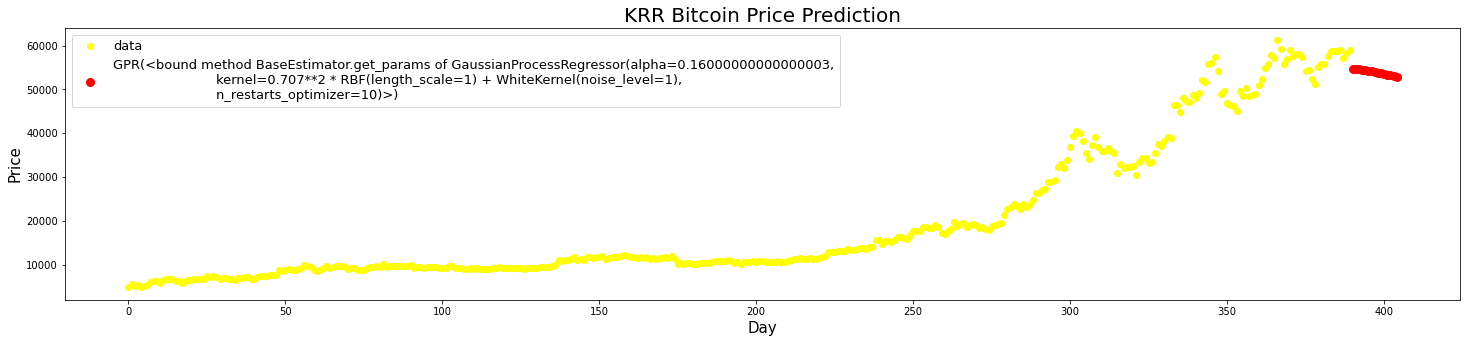

In [22]:
plt.figure(figsize=(25, 5))
lw = 3
plt.scatter(x, y, label='data', color='yellow')
plt.scatter(pred_x_array, y_pred_gpr, color='red', lw=lw,label='GPR(%s)' % gpr.get_params)

plt.xlabel('Day',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.title("KRR Bitcoin Price Prediction",fontsize=20)
plt.legend(loc="best",  scatterpoints=1, prop={'size': 13})
plt.show()

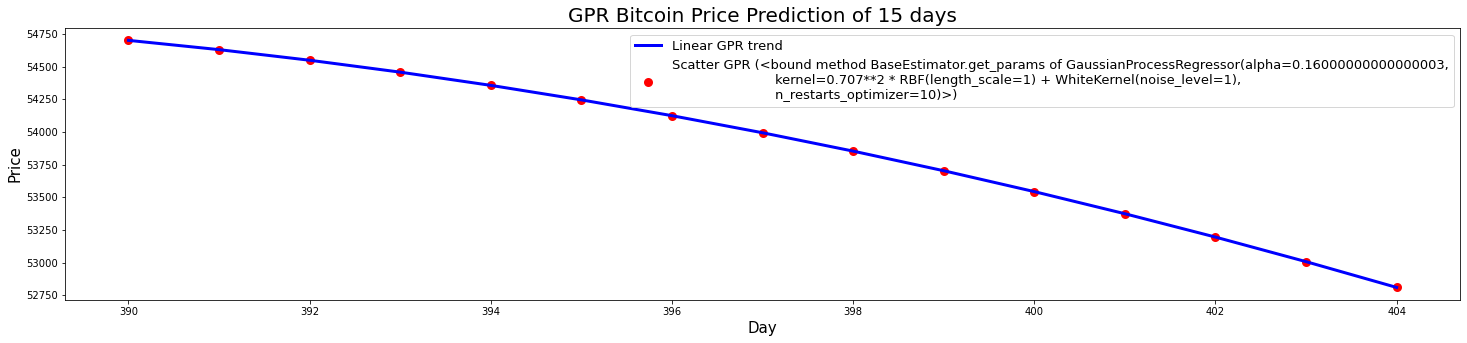

In [23]:
plt.figure(figsize=(25, 5))
lw = 3
plt.scatter(pred_x_array, y_pred_gpr, color='red', lw=lw,
         label='Scatter GPR (%s)' % gpr.get_params)
plt.plot(pred_x_array, y_pred_gpr, color='blue', lw=lw,
         label='Linear GPR trend')

plt.xlabel('Day',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.title("GPR Bitcoin Price Prediction of 15 days",fontsize=20)
plt.legend(loc="best",  scatterpoints=1, prop={'size': 13})
plt.show()

In [24]:
start_date = '2021-04-06'
end_date='2021-04-20'
dates = pd.date_range(start=start_date, end=end_date)

dataframe_kr_gpr = pd.DataFrame({'Date':dates,'KRR Price':np.around(y_kr.flatten(),2),'GPR Price':np.around(y_pred_gpr.flatten(),2)})
dataframe_kr_gpr

,Date,KRR Price,GPR Price
0,2021-04-06,43372.31,54700.55
1,2021-04-07,42353.35,54629.49
2,2021-04-08,44345.88,54548.37
3,2021-04-09,41989.19,54457.24
4,2021-04-10,42748.31,54356.13
5,2021-04-11,42441.47,54245.10
6,2021-04-12,44254.63,54124.19
7,2021-04-13,44819.88,53993.48
8,2021-04-14,47271.92,53853.01
9,2021-04-15,48231.91,53702.87
